Ce notebook présente un modèle de ML quanti

In [0]:
import pandas as pd

In [0]:
housing = pd.read_csv("https://www.stat4decision.com/housing.csv")

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [0]:
# completion des données manquantes par la moyenne de la colonne
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(housing["total_bedrooms"].mean())

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x = housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households','median_house_value']]
y = housing["median_income"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [29]:
print(x.shape, x_train.shape, x_test.shape)

(20640, 6) (14448, 6) (6192, 6)


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(6)
memory usage: 967.6 KB


## Création d'un premier modèle




In [0]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [0]:
# on crée des modèles
modele_lin = LinearRegression()
modele_elastic = ElasticNet()
modele_rf = RandomForestRegressor()

In [33]:
# on ajuste les paramètres des modèles
%time modele_lin.fit(x_train, y_train)
%time modele_elastic.fit(x_train, y_train)
%time modele_rf.fit(x_train, y_train)

CPU times: user 9.82 ms, sys: 7.12 ms, total: 16.9 ms
Wall time: 46.9 ms
CPU times: user 64.8 ms, sys: 50.4 ms, total: 115 ms
Wall time: 59.3 ms


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 696 ms, sys: 48.3 ms, total: 744 ms
Wall time: 699 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
# on va prédire sur les données de test
y_predict_lin = modele_lin.predict(x_test)
y_predict_elastic = modele_elastic.predict(x_test)
y_predict_rf = modele_rf.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [49]:
print(np.sqrt(mean_squared_error(y_test, y_predict_lin)))
print(np.sqrt(mean_squared_error(y_test, y_predict_elastic)))
print(np.sqrt(mean_squared_error(y_test, y_predict_rf)))

1.1386338587972817
1.1401238060674443
0.9454570098370906


In [0]:
import matplotlib.pyplot as plt

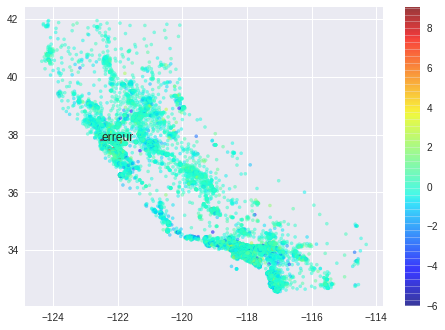

In [57]:
plt.scatter(housing["longitude"],housing["latitude"],c=y-modele_rf.predict(x),cmap="jet",s=10, alpha=0.5)
plt.annotate("erreur",(-122.5,37.79))
plt.colorbar()

In [56]:
housing[y-modele_rf.predict(x)>8]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4492,-118.22,34.06,52.0,48.0,6.000000,41.0,10.0,10.2264,112500.0,<1H OCEAN
6590,-118.18,34.19,48.0,1371.0,537.870553,528.0,155.0,15.0001,500001.0,<1H OCEAN
16171,-122.50,37.79,52.0,8.0,1.000000,13.0,1.0,15.0001,500001.0,NEAR BAY
18504,-121.96,37.13,26.0,50.0,5.000000,17.0,4.0,15.0001,400000.0,<1H OCEAN
